In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
df =sns.load_dataset('tips')

In [304]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
177,14.48,2.00,Male,Yes,Sun,Dinner,2
66,16.45,2.47,Female,No,Sat,Dinner,2
222,8.58,1.92,Male,Yes,Fri,Lunch,1
235,10.07,1.25,Male,No,Sat,Dinner,2
56,38.01,3.00,Male,Yes,Sat,Dinner,4


In [305]:
df.shape

(244, 7)

In [306]:
df= df.drop_duplicates()

In [307]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 9.1 KB


In [309]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [310]:
df.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


C:\Users\solan\AppData\Local\Temp\ipykernel_12012\1285936593.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

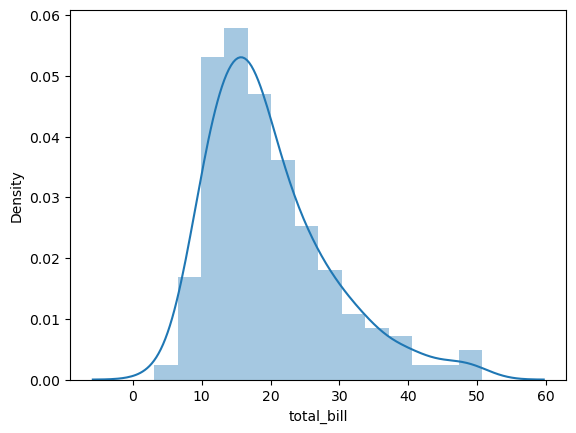

In [311]:
sns.distplot(df['total_bill'])

<Axes: >

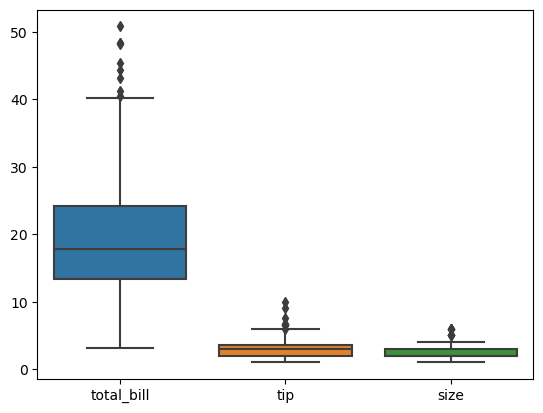

In [312]:
sns.boxplot(df[['total_bill', 'tip' , 'size']])

In [313]:
# handling outlier 


In [314]:
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)

In [315]:
IQR = Q3-Q1

In [316]:
upper_L = Q3 + 1.5*IQR
lower_L = Q1 - 1.5*IQR

In [317]:
upper_L

40.36749999999999

In [318]:
lower_L

-2.8124999999999964

In [319]:
df[df['total_bill'] < lower_L]

,total_bill,tip,sex,smoker,day,time,size


In [320]:
df[df['total_bill'] > upper_L]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [321]:
df[(df['total_bill'] < lower_L ) | (df['total_bill'] > upper_L)]



,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [322]:
df_n = df[df['total_bill'] < upper_L]

In [323]:
df_n

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [324]:
# Trimming  method-1

<Axes: >

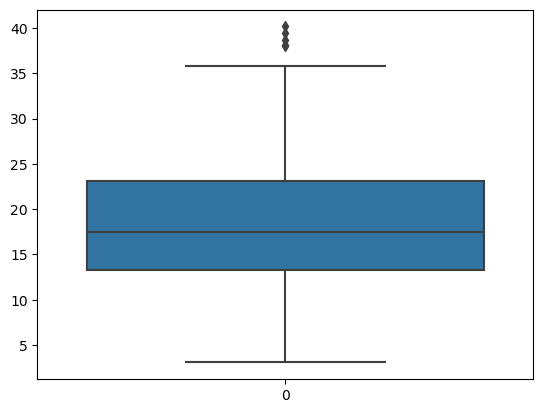

In [325]:
sns.boxplot(df_n['total_bill'])

In [326]:
# clapping method


In [327]:
df_NN = df_n.copy()

In [328]:
df_NN['total_bill'] = np.where(
df_NN['total_bill'] > upper_L,
    upper_L,
np.where(df_NN['total_bill'] < lower_L ,
        lower_L,
        df_NN['total_bill']))

<Axes: >

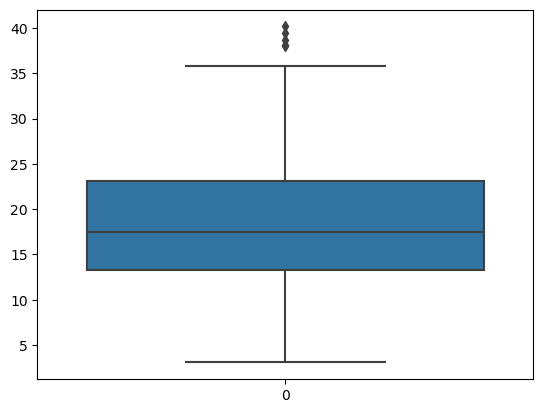

In [329]:
sns.boxplot(df_NN['total_bill'])

C:\Users\solan\AppData\Local\Temp\ipykernel_12012\253857677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_NN['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

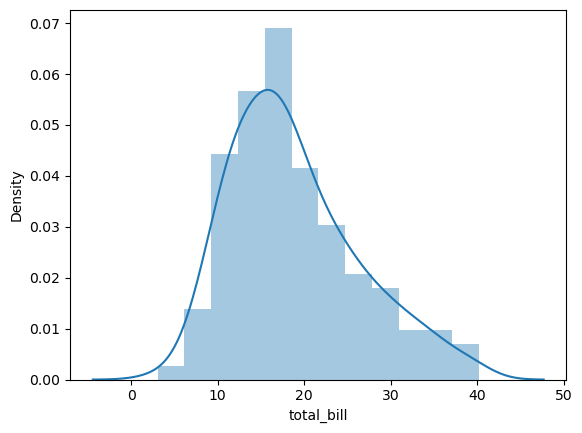

In [330]:
sns.distplot(df_NN['total_bill'])

C:\Users\solan\AppData\Local\Temp\ipykernel_12012\1285936593.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

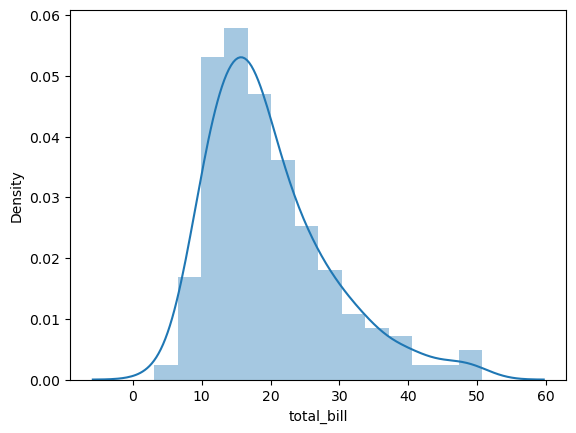

In [331]:
sns.distplot(df['total_bill'])

In [332]:
#boundary method"

In [286]:
upper_B = df['total_bill'].mean() +3 * df['total_bill'].std()
lower_B = df['total_bill'].mean() - 3 * df['total_bill'].std()

In [287]:
upper_B

46.54408074185021

In [288]:
lower_B

-6.9163441163358

In [340]:
new_df = df[df['total_bill'] < 46.54408074185021 ]

<Axes: >

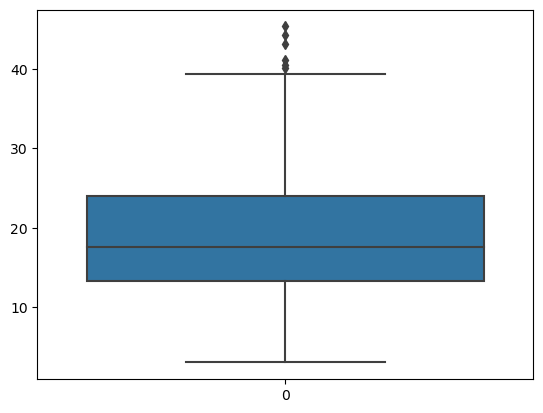

In [341]:
sns.boxplot(df_new['total_bill'])

In [290]:
df.shape

(243, 7)

In [291]:
df_NNN = df[(df['total_bill'] < 46.54408074185021 )  & (df['total_bill'] > -6.9163441163358)]

In [292]:
df_NNN

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [293]:
df_NNN.shape

(239, 7)

<Axes: >

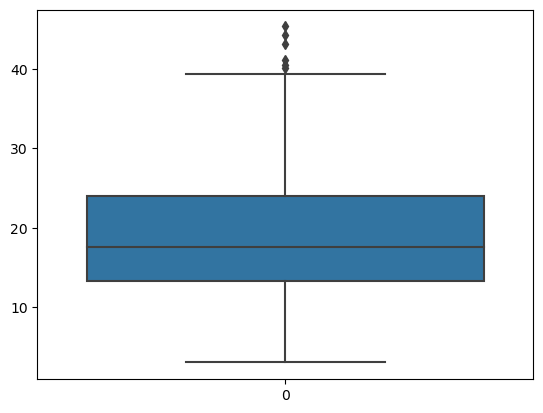

In [294]:
sns.boxplot(df_NNN['total_bill'])

In [295]:
df['total_bill_zscore'] = (df['total_bill'] - df['total_bill'].mean())/df['total_bill'].std()

In [296]:
df

,total_bill,tip,sex,smoker,day,time,size,total_bill_zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.316930
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063276
2,21.01,3.50,Male,No,Sun,Dinner,3,0.134245
3,23.68,3.31,Male,No,Sun,Dinner,2,0.433906
4,24.59,3.61,Female,No,Sun,Dinner,4,0.536037
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.034350
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.826720
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.320551
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.223777


In [297]:
df[df['total_bill_zscore'] > 3]


,total_bill,tip,sex,smoker,day,time,size,total_bill_zscore
59,48.27,6.73,Male,No,Sat,Dinner,4,3.193704
156,48.17,5.00,Male,No,Sun,Dinner,6,3.182481
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.478775
212,48.33,9.00,Male,No,Sat,Dinner,4,3.200438


In [298]:
df[df['total_bill_zscore'] < -3 ]

,total_bill,tip,sex,smoker,day,time,size,total_bill_zscore


In [299]:
df[(df['total_bill_zscore'] >3 ) | (df['total_bill_zscore'] < -3)]

,total_bill,tip,sex,smoker,day,time,size,total_bill_zscore
59,48.27,6.73,Male,No,Sat,Dinner,4,3.193704
156,48.17,5.00,Male,No,Sun,Dinner,6,3.182481
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.478775
212,48.33,9.00,Male,No,Sat,Dinner,4,3.200438


In [300]:
df_nn =df[(df['total_bill_zscore']  < 3 ) | (df['total_bill_zscore'] > -3)]

<Axes: >

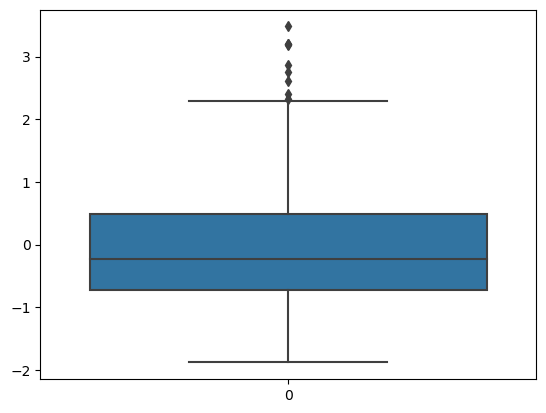

In [301]:
sns.boxplot(df_nn['total_bill_zscore'])

In [344]:
from sklearn.model_selection import train_test_split   
from sklearn.preprocessing import StandardScaler

In [348]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(df1.drop('tip', axis=1),
                                               df1['tip'],
                                               test_size=0.3,
                                               random_state=0)
X_train.shape, X_test.shape

((170, 6), (73, 6))

In [349]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)

ValueError: could not convert string to float: 'Male'